<a href="https://colab.research.google.com/github/jmadao/POS_DSA_PUC_RJ/blob/main/MVP_III_ENG_DADOS_JOAO_ADAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPRINT III - MVP - João Marco Adão Ananias

## Definição do Problema

Em um cenário hipotético, somos uma empresa do ramo varejista, onde vendemos alimentos e bebidas.

Em tempos em que os dados possuem grande valor para a tomada de decisão, nos foi solicitado construir a estrutura de dados da companhia.

Como prioridade, a diretoria nos pediu para iniciar o projeto com as informações de vendas, já que são as informações do "Core Business" de nosso negócio.

## 1) Objetivo



Nesta nossa missão, nosso principal objetivo é: **Gerar valor para o negócio e apoiar na tomada de decisão!**

###1.1) Direcionamento

Para isso, inicialmente, iremos utilizar a metodologia **5W2H**, onde teremos as seguintes questões:


1.   O que Vendemos?       *-> Análise de produtos*
2.   Onde Vendemos?        *-> Localização de nossas lojas*
3.   Quando Vendemos?      *-> Venda ao longo do tempo*
4.   Quem Vende?           *-> Venda por funcionário, gerente*
5.   Como Vendemos?        *-> Nosso processo de venda*
6.   Por que Vendemos?     *-> Nosso objetivo, nosso motivo, nossas metas*
7.   Quanto Vendemos?      *-> Quanto vendemos, quanto custa nossos produtos?*


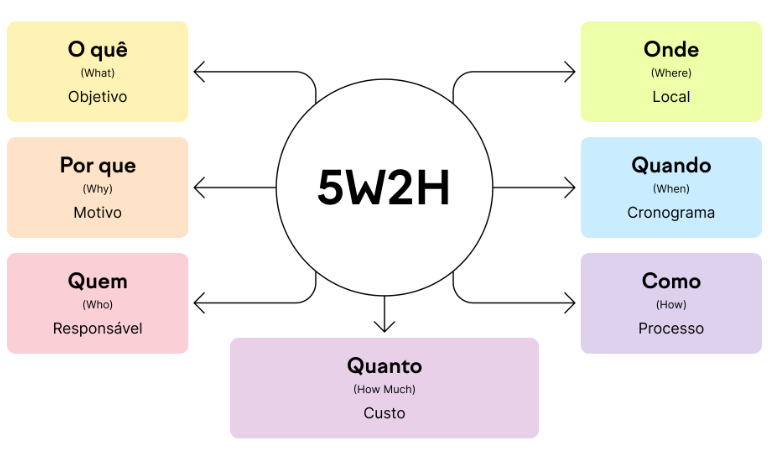


Respondendo estas perguntas, temos um direcionamento de quais dados precisamos ter em nosso modelo, como:


**Produto, Loja, Vendedor, Data, Preço do Produto, Quantidade Vendida, Meta.**


###1.2) Análises Planejadas

Organizando os dados citados acima, temos uma possibilidade imensa de utilização dos dados. Segue abaixo uma lista de análises que poderiam nos auxiliar a tomar decisões:


1.   Faturamento
2.   Volume vendido
3.   Preço médio
4.   Qtd de vendas
5.   Volume por venda
6.   Ticket médio
7.   Variação dos indicadores acima contra Ano Anterior
8.   Análise de pareto (quantos % de nossas categorias representam 80% do nosso faturamento)
9.   Análise de cesta (quais categorias costumam sair juntas no mesmo cupom)
10.  Alcance % e Desvio da meta definida
11.  Melhores Dias de Vendas

Todas essas análises citadas, poderão ser analisas pelas seguintes "dimensões":

1. Árvore mercadológica
2. Geografia (Localização das Lojas)
3. Vendedor
4. Calendário (Informações Temporais)



###1.3) Arquitetura e Processo

Com as análises que queremos construir bem definidas, chegou a hora de definirmos como armazenar e coletar nossos dados.

Com o objetivo de otimizar custos e construirmos nossa estrutura de dados com ferramentas modernas e escaláveis, optamos por construir tudo em Cloud.

A Cloud escolhida foi a: **Google Cloud Plataform (GCP)**

Os dados de vendas de nossa empresa são disponibilizados periodicamente em um **Bucket** na **Google Cloud Storage (GCS)**

Iremos realizar o processo de **ETL (Extração, Transformação e Carga)** destes dados utilizando o **Google Data Fusion**

Estes dados serão carregados no **BigQuery**, onde teremos construído nosso **Data WareHouse** e seus **DataMarts**

Para catalogar e documentar nossos dados, utilizaremos o **Google DataPlex**

Para analisar estes dados, poderemos utilizar **linguagem SQL**, dentro do próprio **BigQuery**, assim como o **Power BI**, ferramenta poderosa para análise de dados.

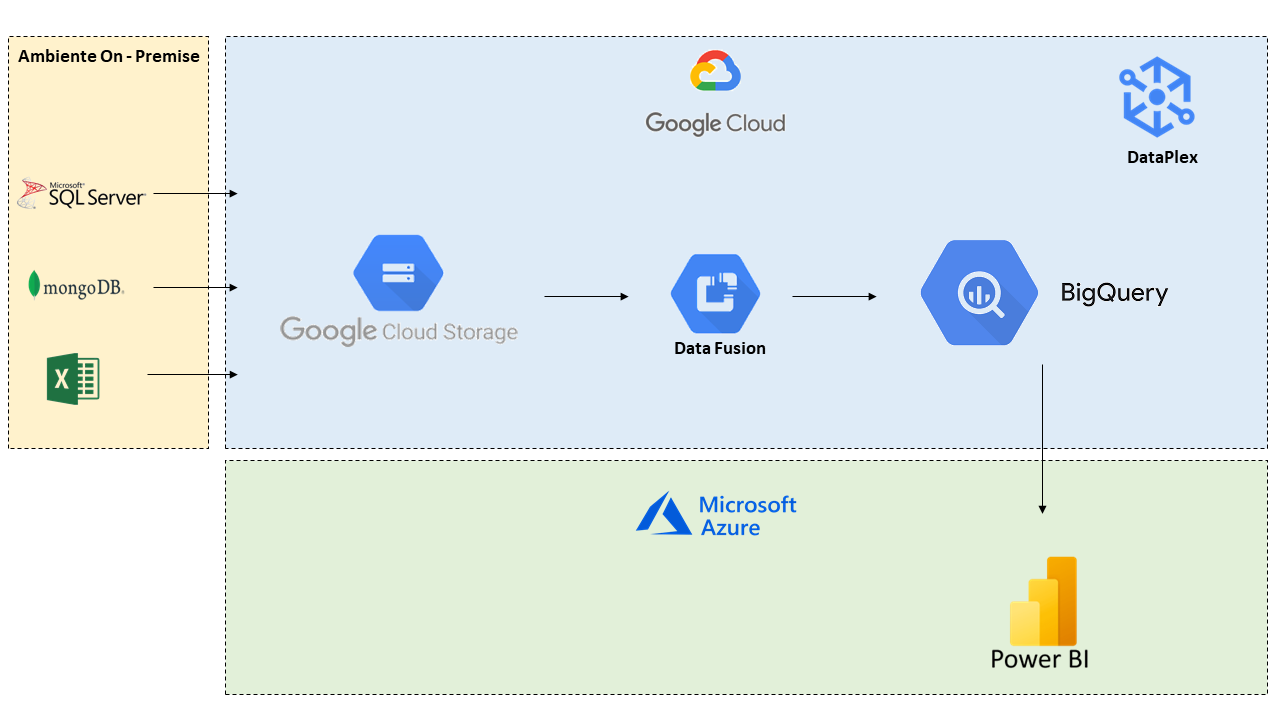

## 2) Coleta

Os dados brutos são armazenados em um Bucket do Google Cloud Storage.

Estes dados estão em um formato csv, delimitados por ";".

Foi criado um Bucket chamado: raw-jma2-mvp.

Estes dados serão coletados do Bucket, utilizando o Google Data Fusion, e armazenados no BigQuery.

Neste Bucket temos os seguintes arquivos:

*   Calendario.csv
*   Lojas.csv
*   Metas.csv
*   NotasXLoja.csv
*   Produtos.csv
*   Vendas.csv
*   Vendedores.csv

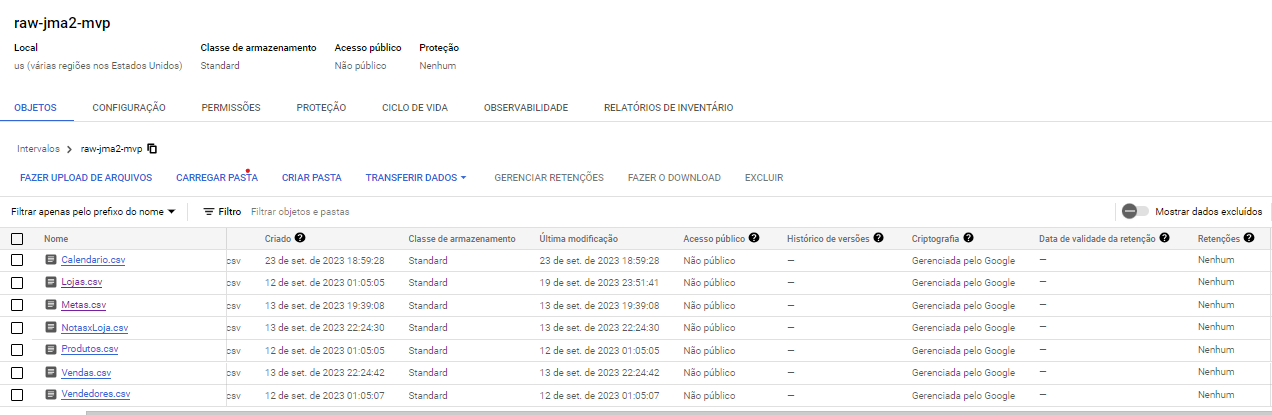

###2.1) Metadados

Abaixo, teremos os metadados de cada Arquivo csv persistente em nosso Bucket.

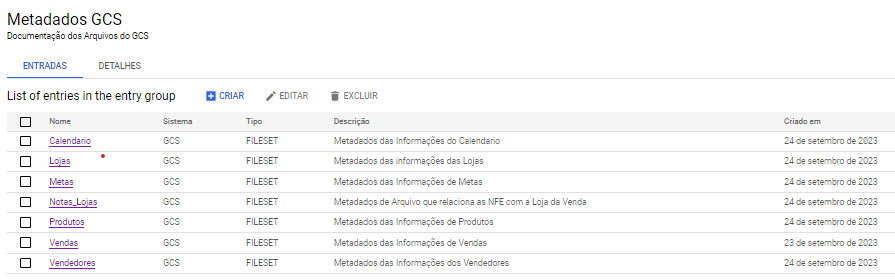

####2.1.1) Calendario

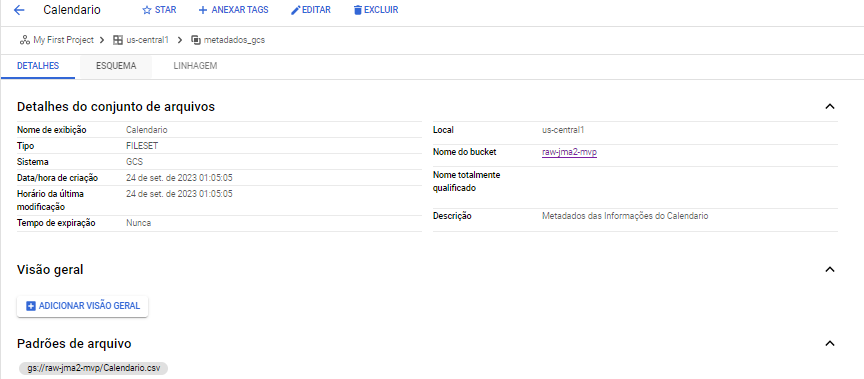

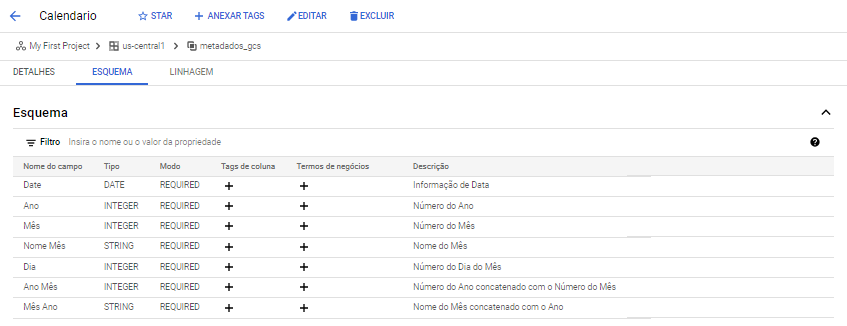

####2.1.2) Lojas

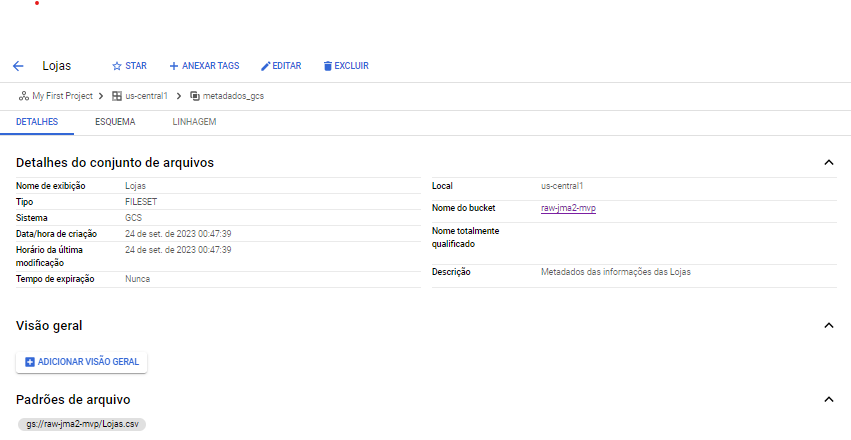

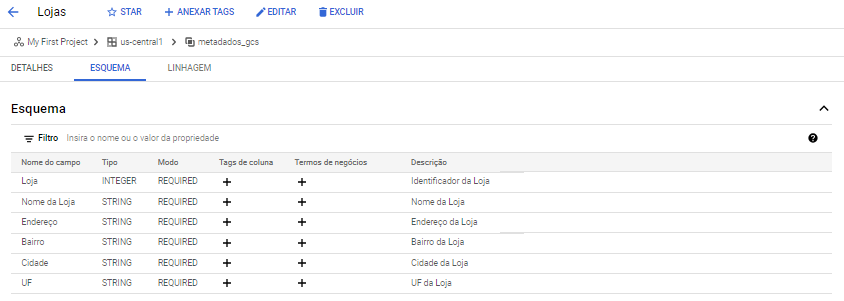

####2.1.3) Metas

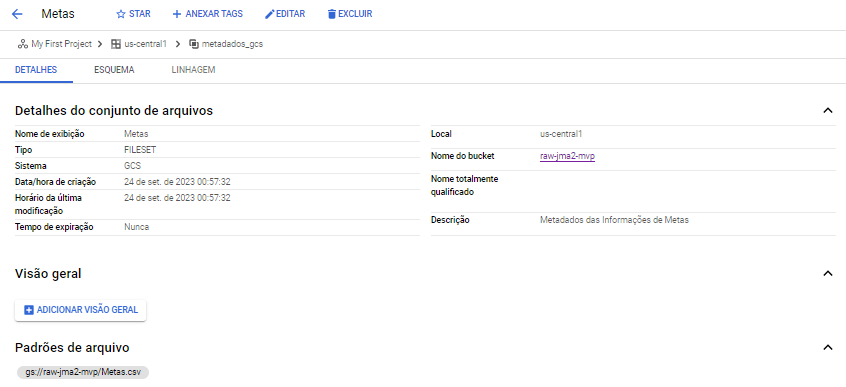

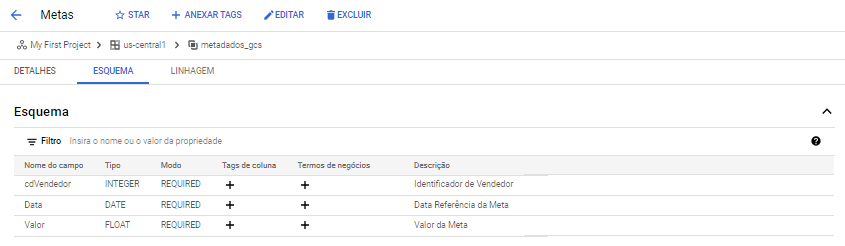

####2.1.4) Notas_Loja

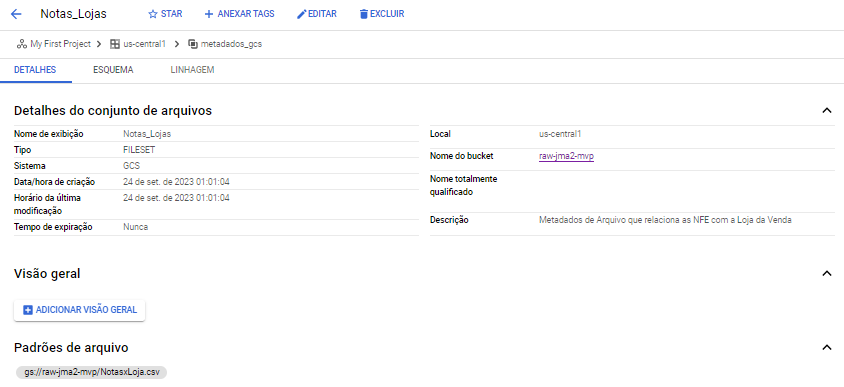

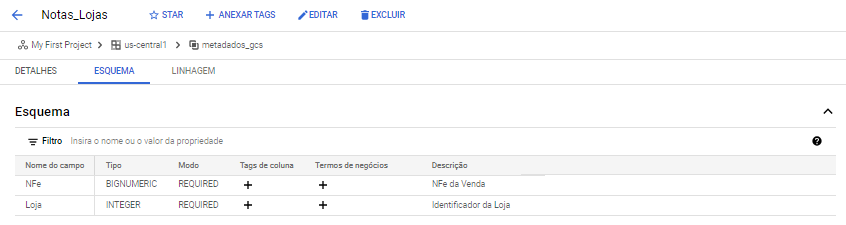

####2.1.5) Produtos

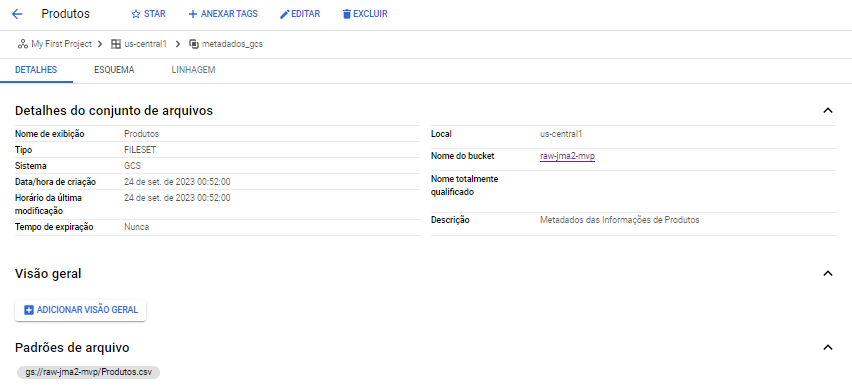

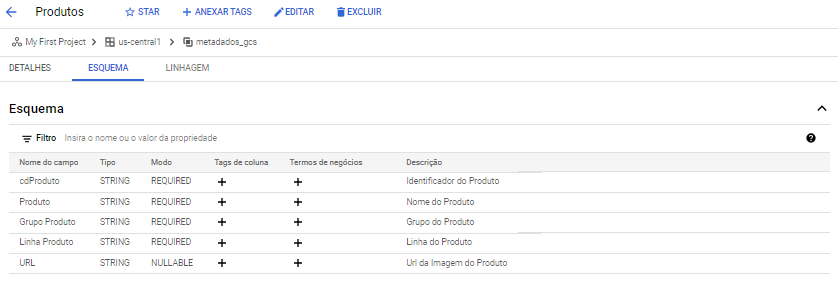

####2.1.6) Vendas

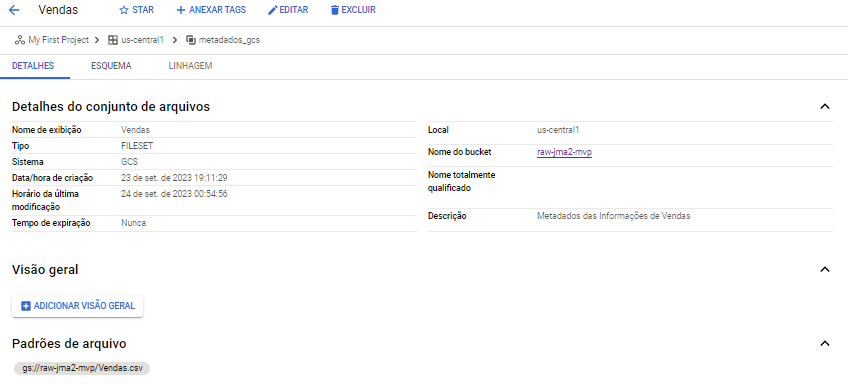

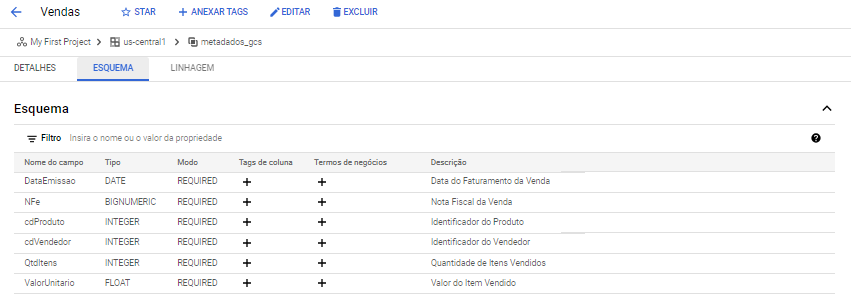

####2.1.7) Vendedores

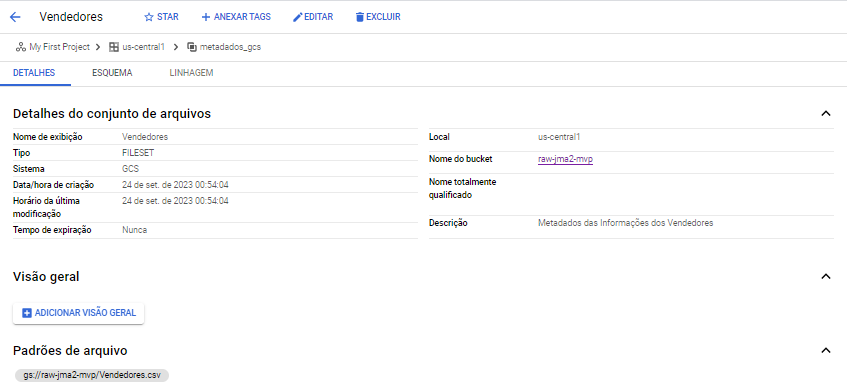

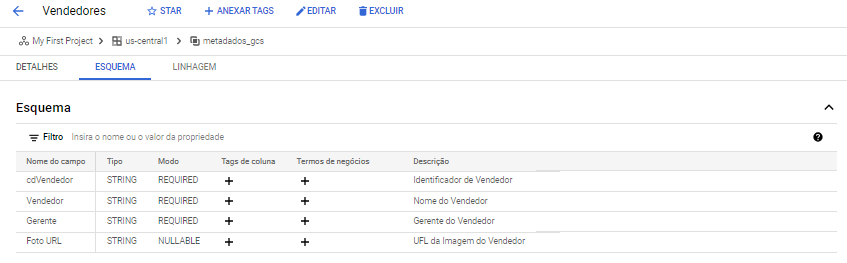

## 3) Modelagem

###3.1) Esquema de Dados

Para nosso **Data Mart Vendas**, iremos utilizar o **Star Schema**, uma vez que ele traz algumas vantagens, exemplo:


1.   Ótima performance para trabalhar com grandes volumes de dados;
2.   Tabelas claramente identificadas e organizadas;
3.   Possibilidade de múltiplas análises;
4.   Flexibilidade para implantar novas análises;
5.   Menor custo de armazenamento


Seguindo nosso modelo escolhido então, teremos o seguinte Schema:


*   **Fatos**

1.   ft_vendas
2.   ft_metas


*   **Dimensões**

1.   dm_calendario
2.   dm_vendedor
3.   dm_loja
4.   dm_produto


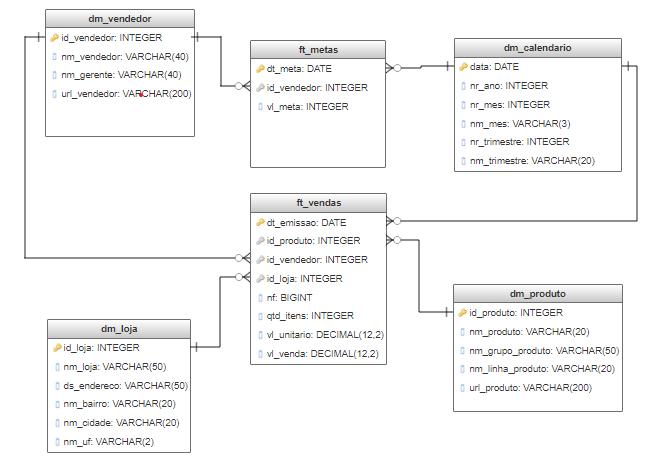








###3.2) Catálogo de Dados

Aqui iremos expor toda a documentação e catalogação das tabelas, que criamos no BigQuery.

####3.2.1) ft_vendas

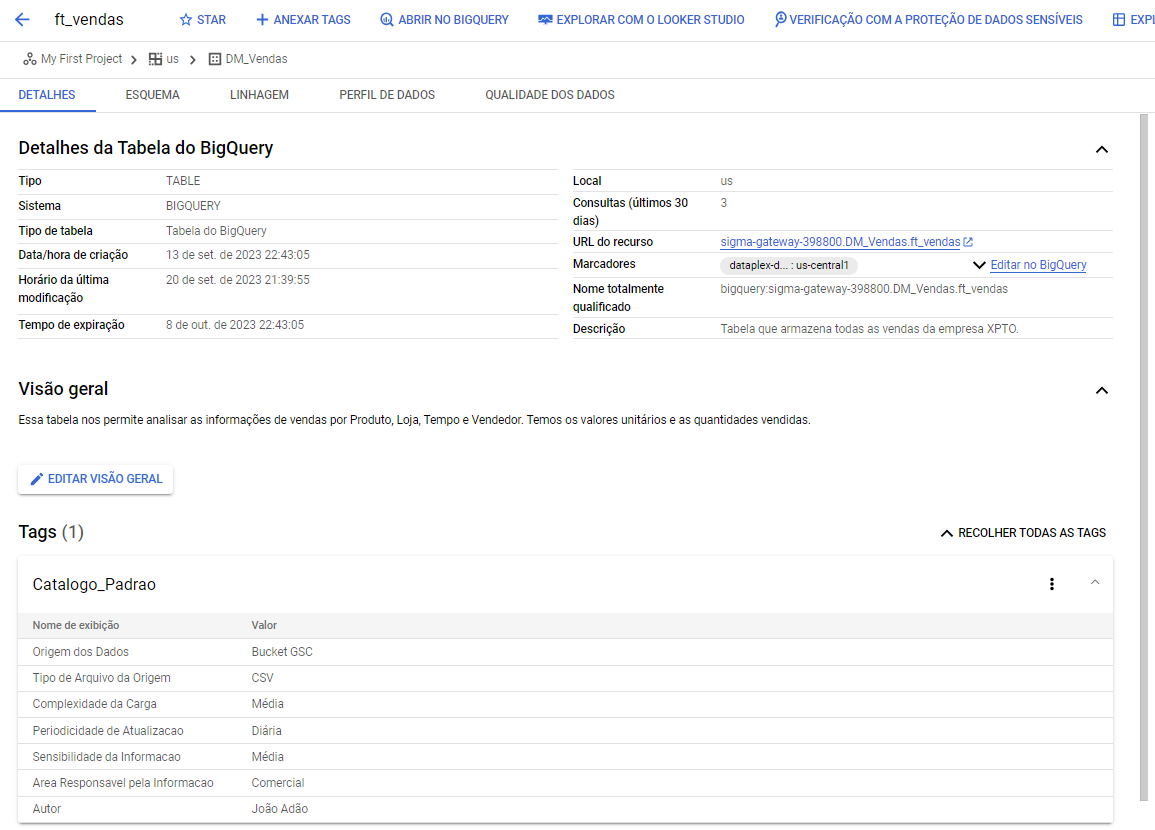

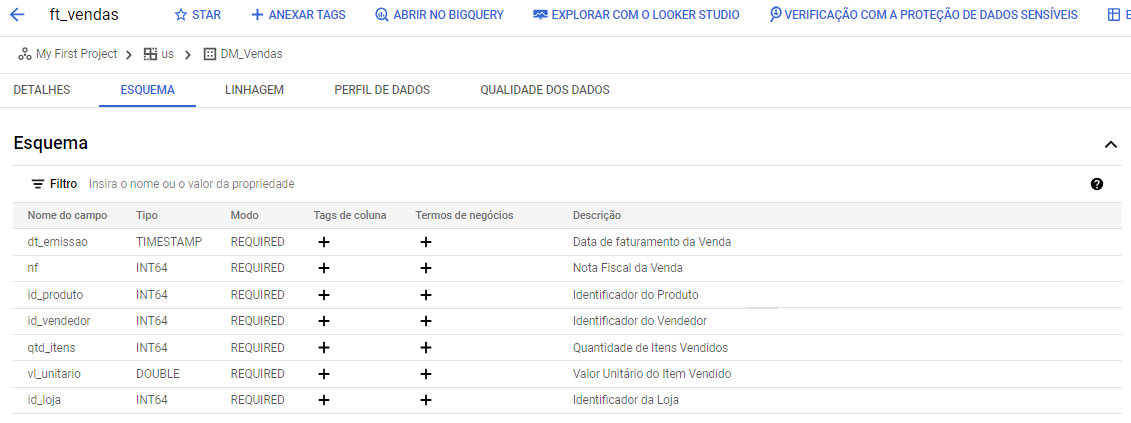

####3.2.2) ft_metas

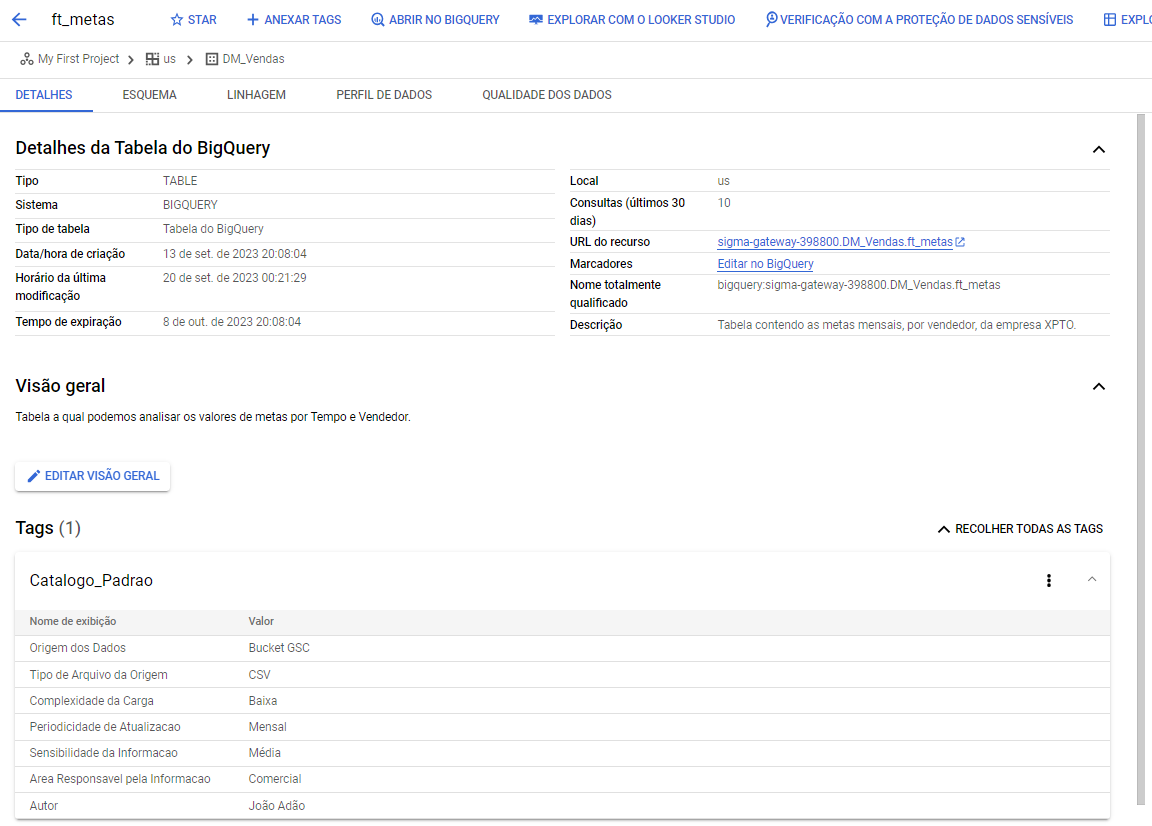

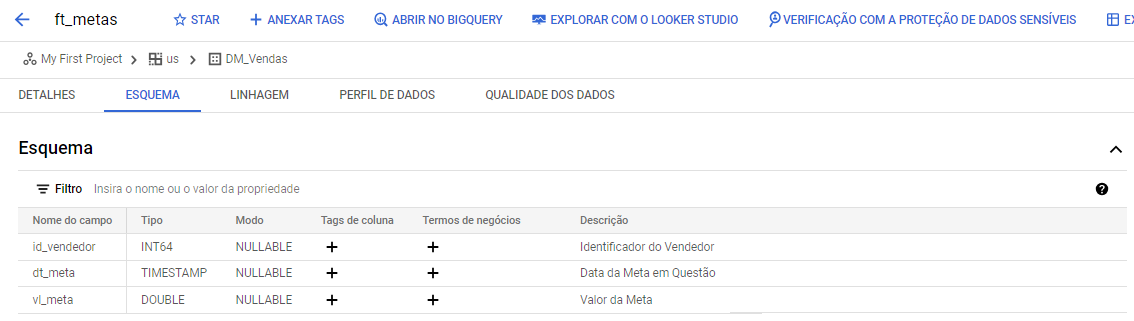

####3.2.3) dm_calendario

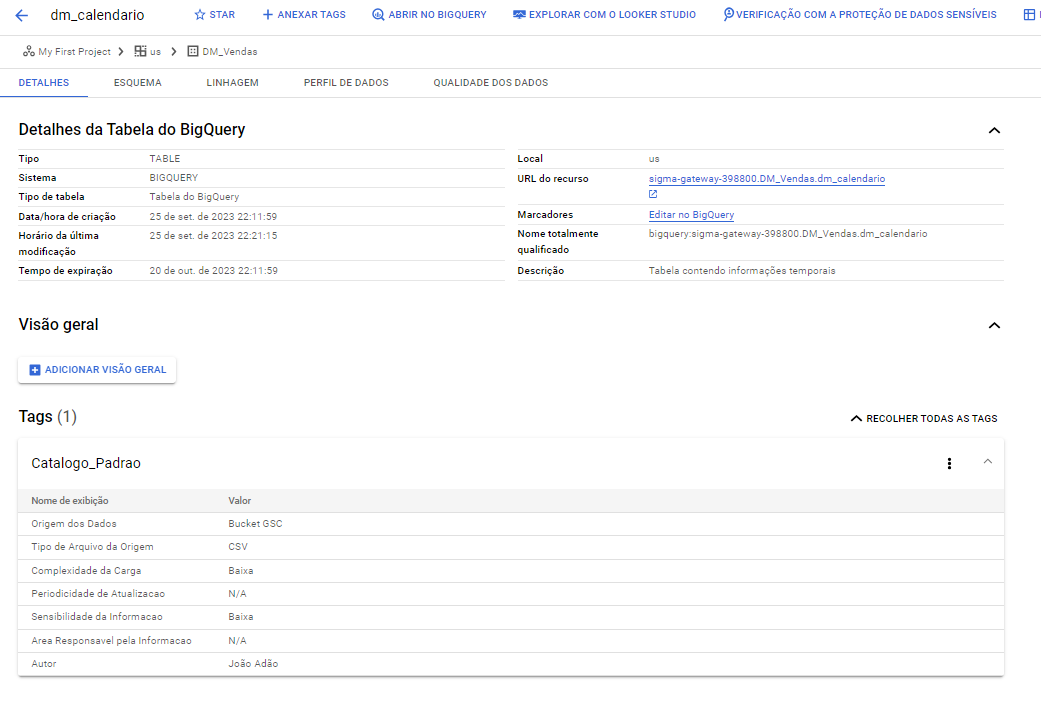

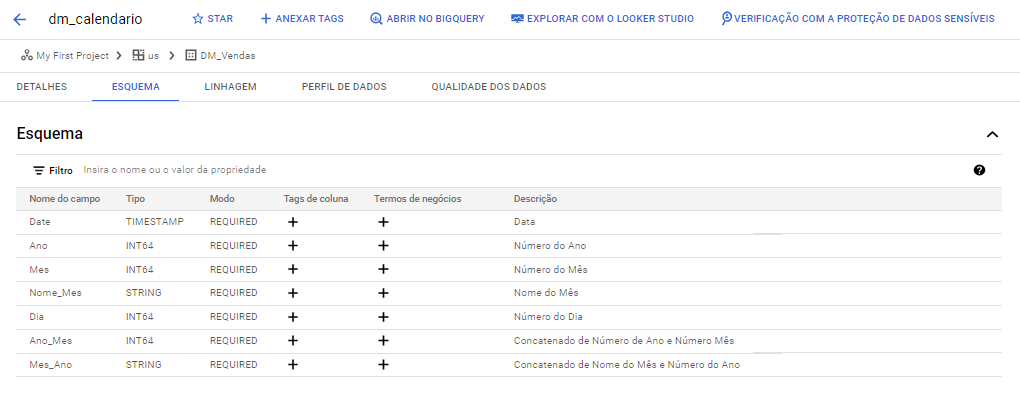

####3.2.4) dm_vendedor

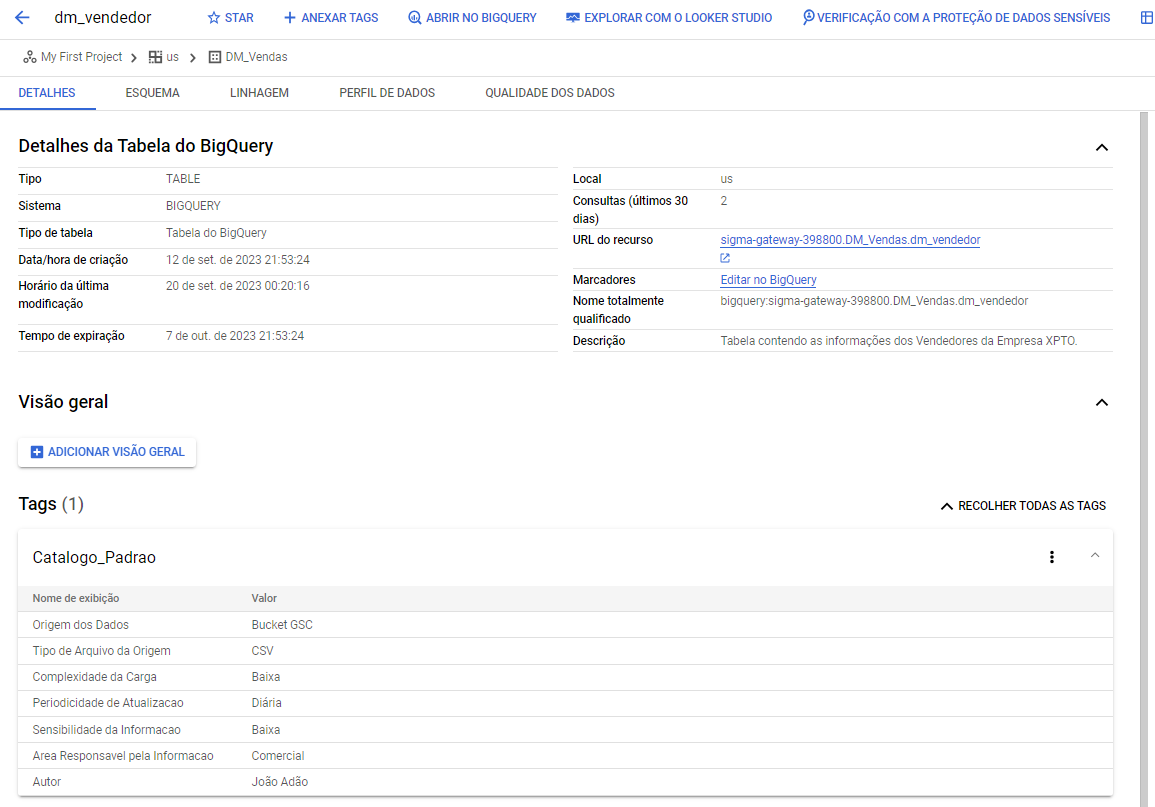

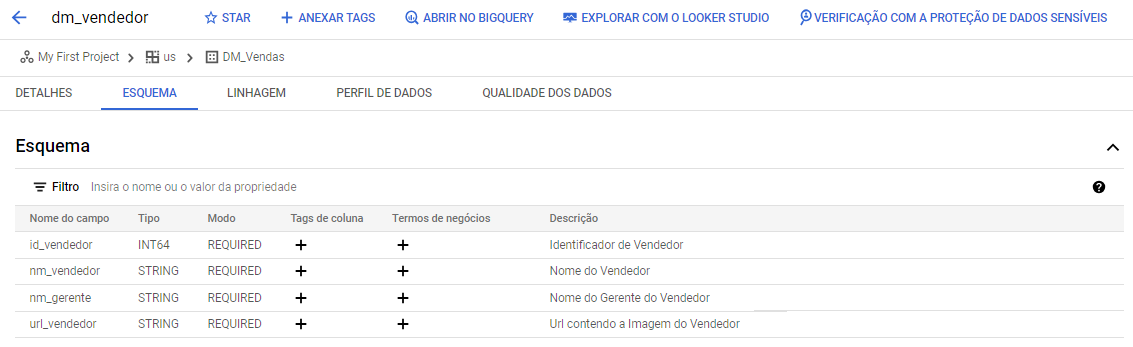

####3.2.5) dm_loja

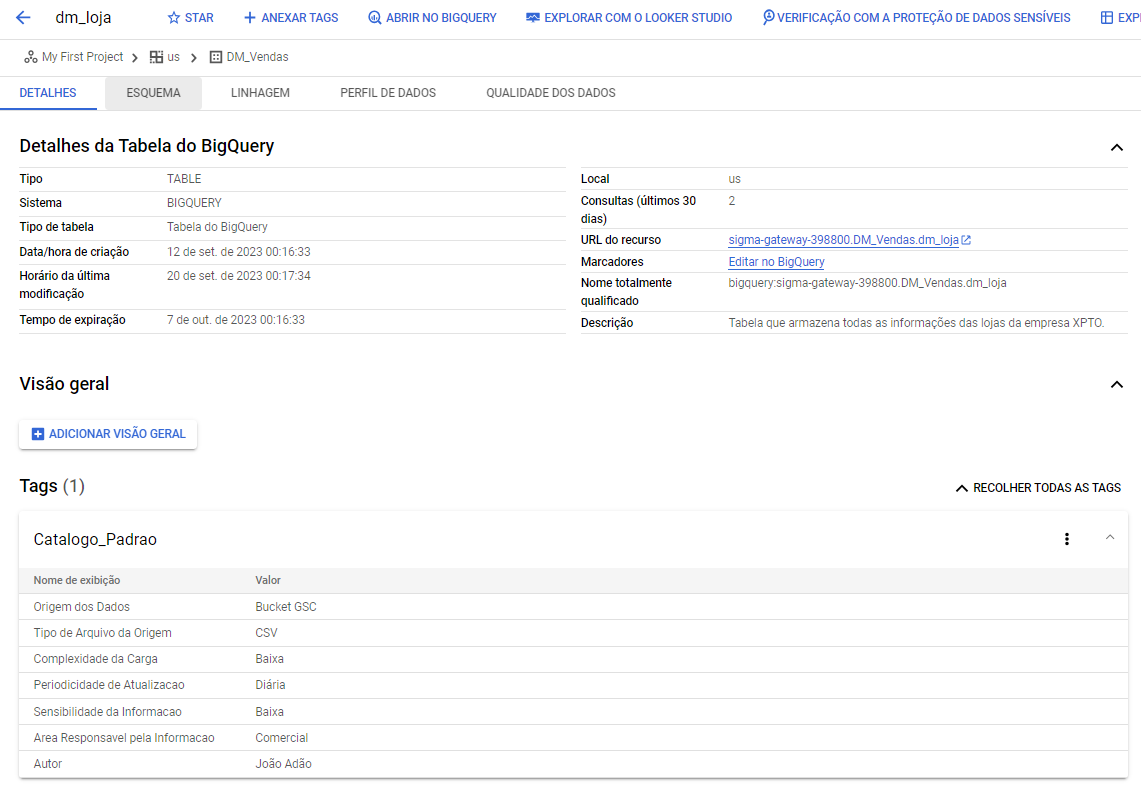

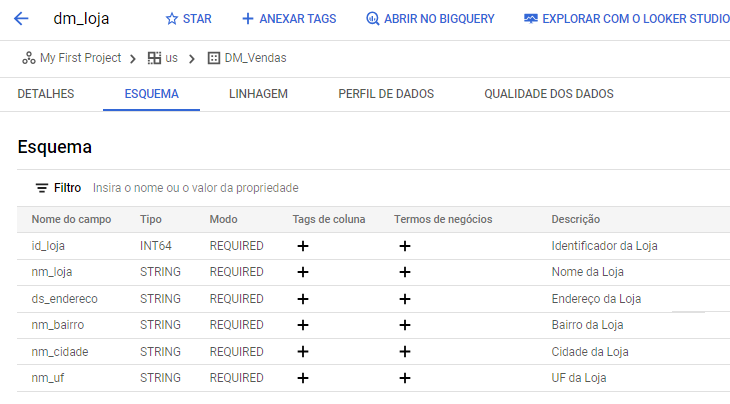

####3.2.6) dm_produto

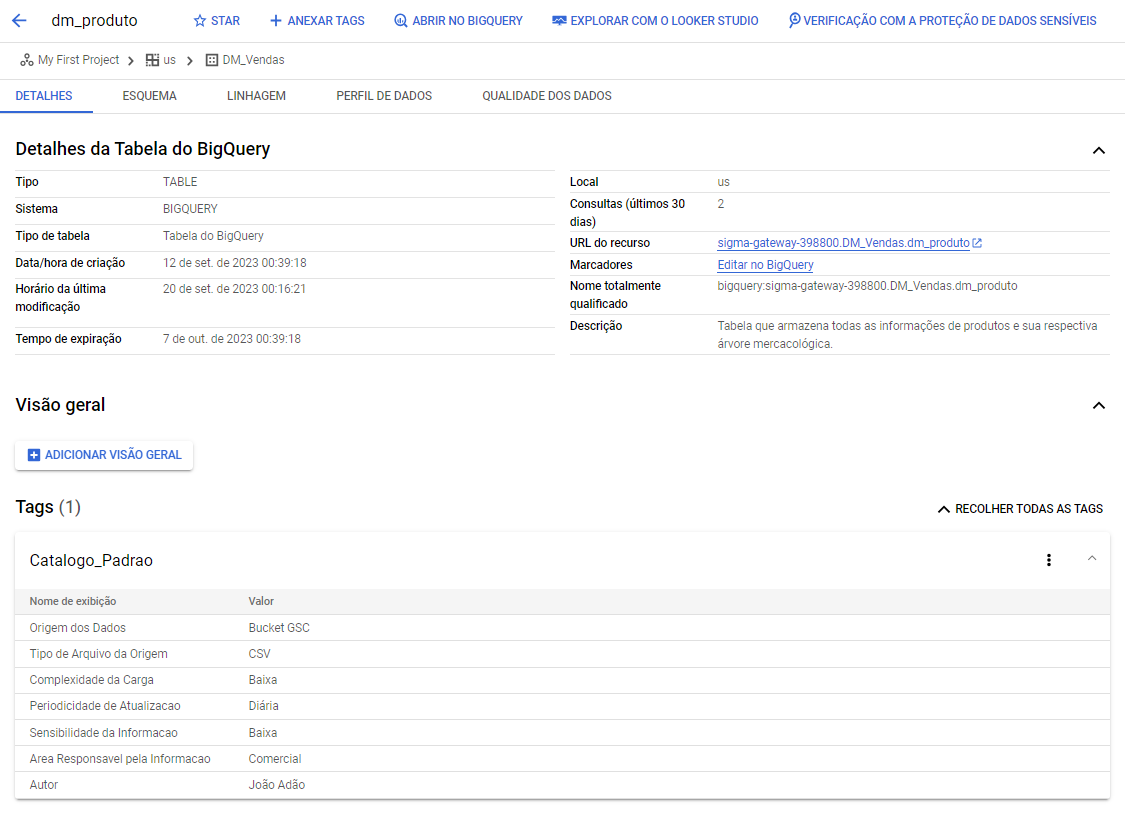

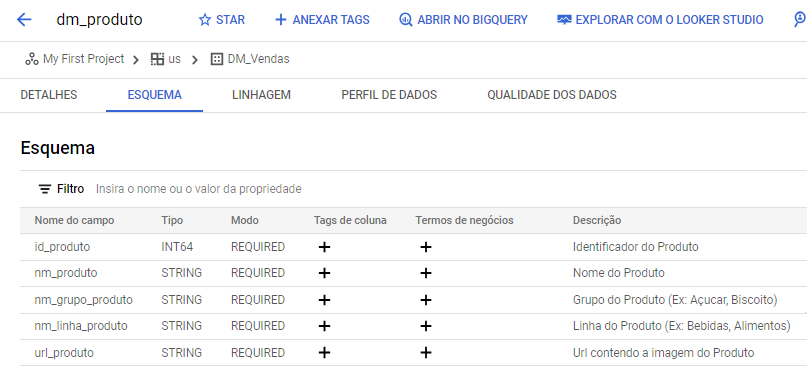

## 4) Carga

Neste tópico, será apresentado os fluxos de ETL, construídos no Google Data Fusion, para extrair os dados do GCS, realizar os tratamentos necessários e persistí-los no BigQuery.

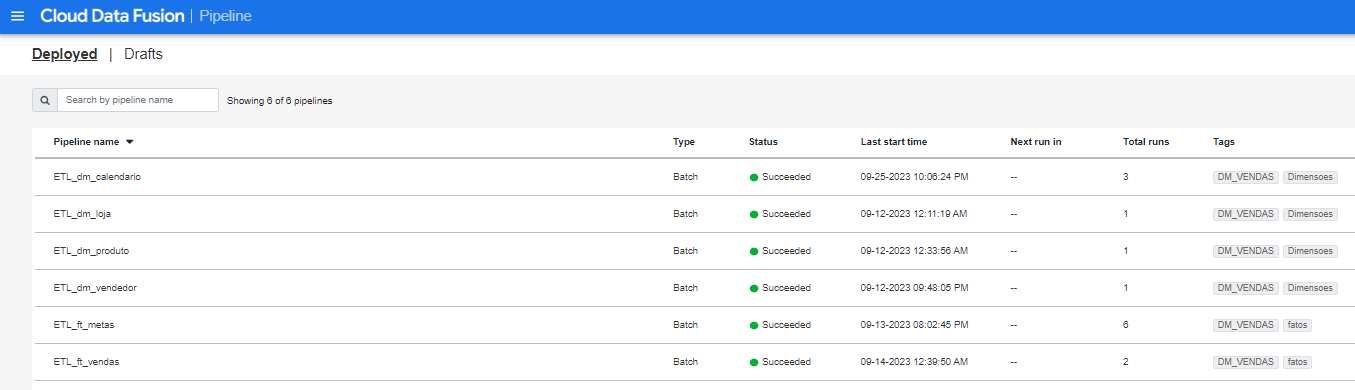


###4.1) ETL_dm_calendario

Origem: Google Cloud Storage

Arquivo: Calendario.csv

Tratamentos realizados: Tratamento de Campo de Data, transformando de String para TimeStamp

Destino: BigQuery

Tabela: dm_calendario

Registros: 730

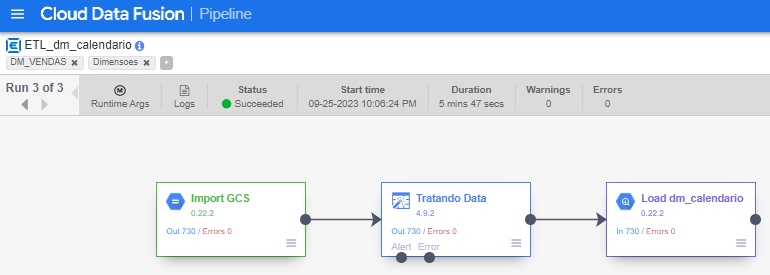



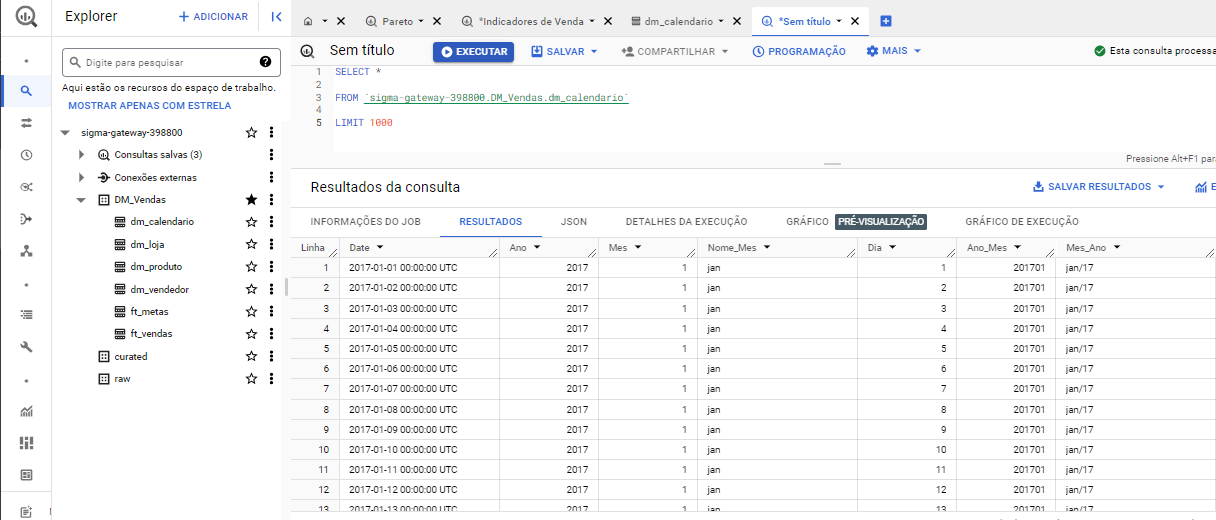

###4.2) ETL_dm_loja

Origem: Google Cloud Storage

Arquivo: Lojas.csv

Tratamentos realizados: Sem tratamentos específicos

Destino: BigQuery

Tabela: dm_loja

Registros: 4

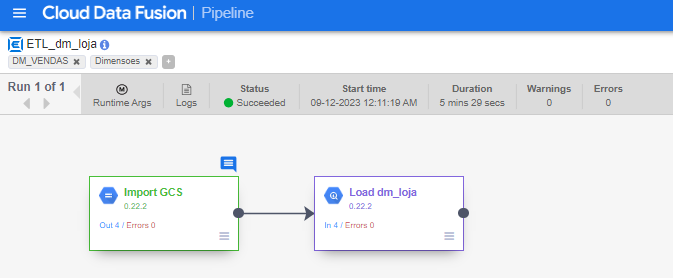

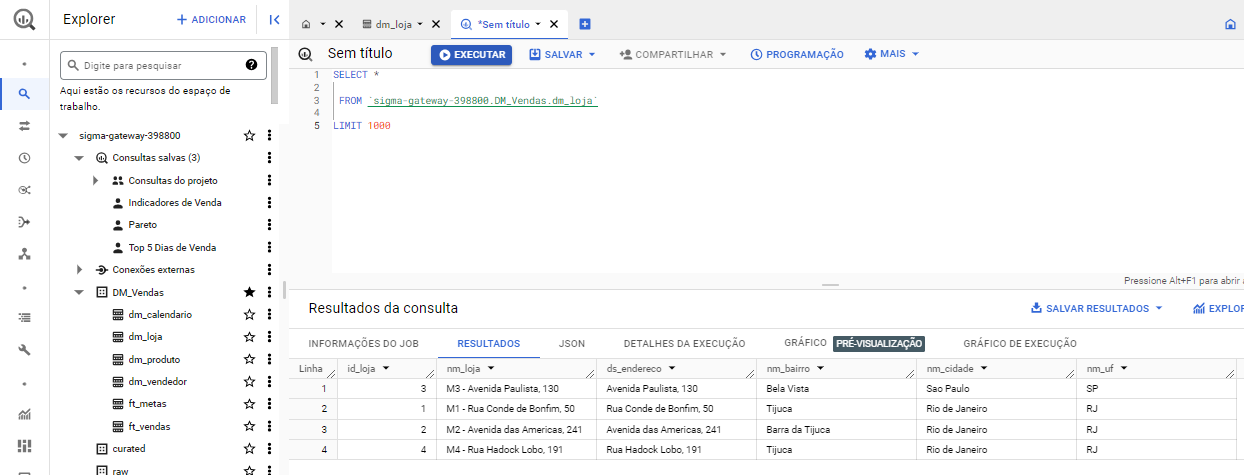

###4.3) ETL_dm_produto

Origem: Google Cloud Storage

Arquivo: Produtos.csv

Tratamentos realizados: Sem tratamentos específicos

Destino: BigQuery

Tabela: dm_produto

Registros: 798

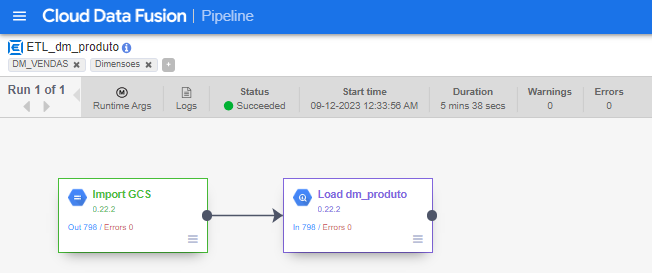

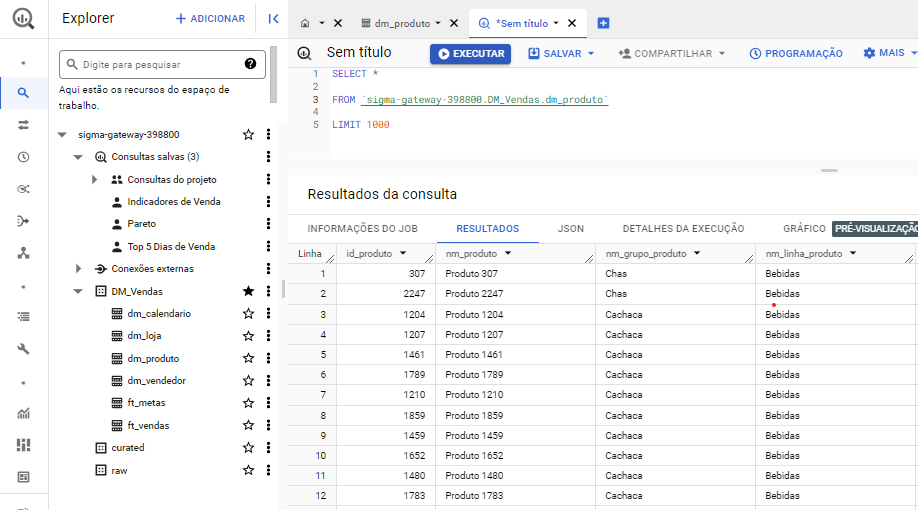

###4.4) ETL_dm_vendedor

Origem: Google Cloud Storage

Arquivo: Vendedores.csv

Tratamentos realizados: Sem tratamentos específicos

Destino: BigQuery

Tabela: dm_vendedor

Registros: 12

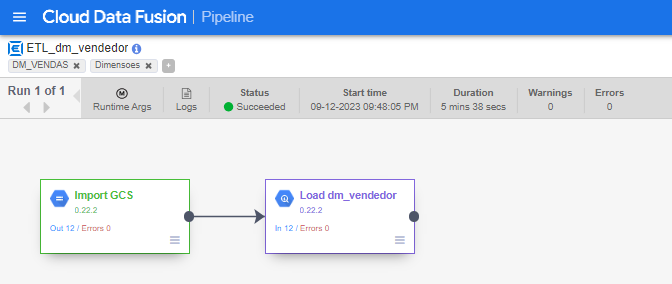

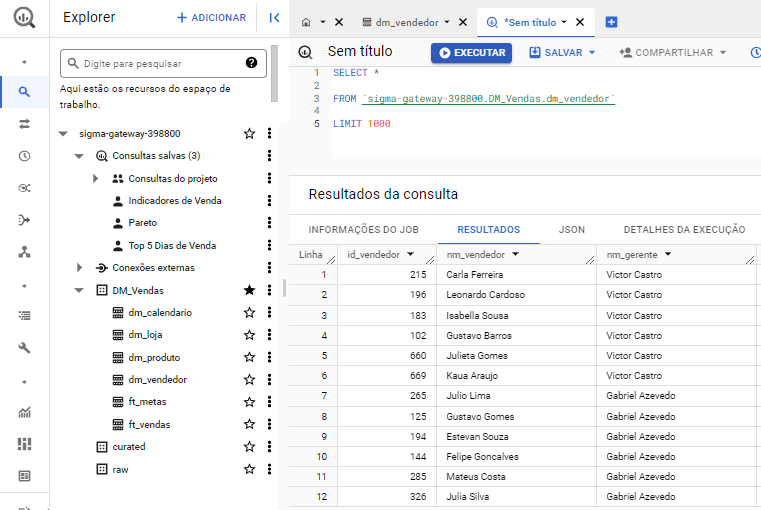

###4.5) ETL_ft_metas

Origem: Google Cloud Storage

Arquivo: Metas.csv

Tratamentos realizados: Tratamento de Campo de Data, transformando de String para TimeStamp e Valor para "Double"

Destino: BigQuery

Tabela: ft_metas

Registros: 197

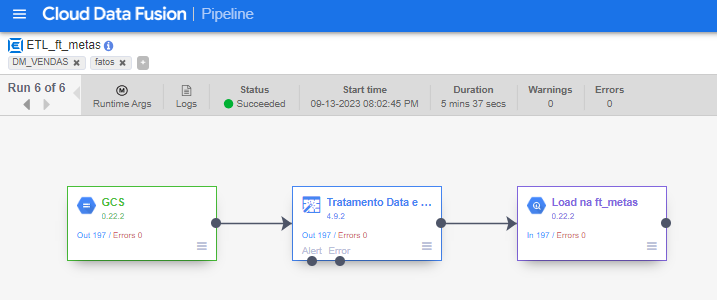

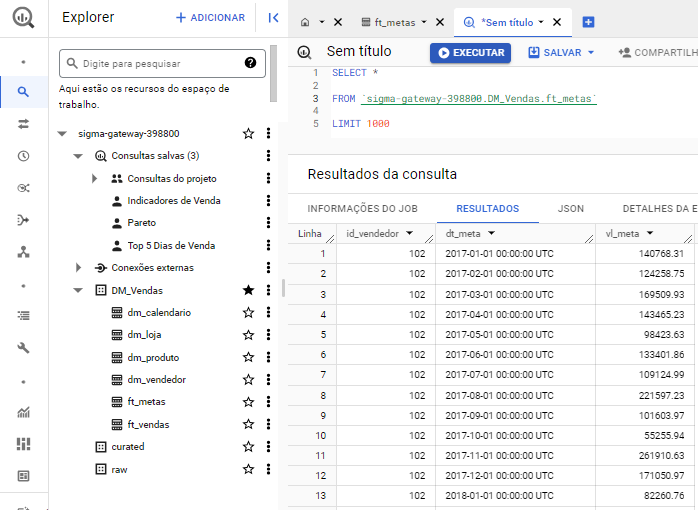

###4.6) ETL_ft_vendas

Origem: Google Cloud Storage

Arquivo: Vendas.csv e NotasxLoja.csv

Tratamentos realizados: Tratamento de Campo de Data, transformando de String para TimeStamp, tratamento dos campos de NFe, para inteiro, seguido do Left Join entre os 2 arquivos, pela própria NFe, para trazer a Loja juntamente a venda.

Destino: BigQuery

Tabela: ft_vendas

Registros: 245.848

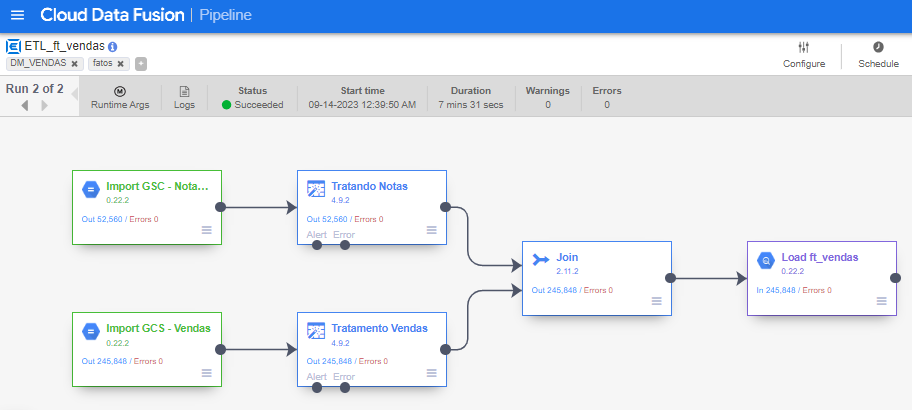

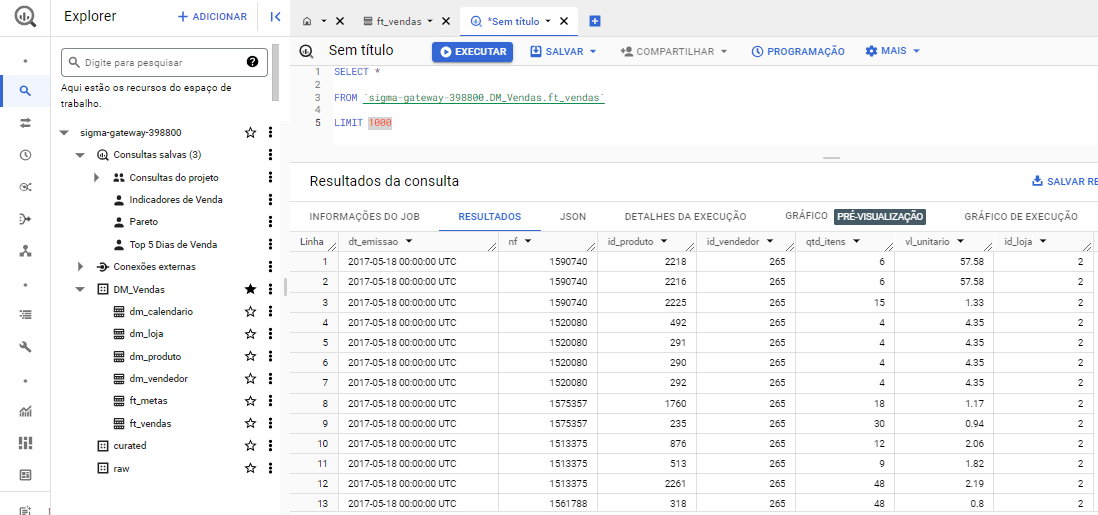

## 5) Análise

###5.1) Qualidade de Dados

Neste tópico, vamos trazer algumas execuções quanto ao âmbito de qualidade de dados.

Nossa intenção em relação a qualidade de dados, é garantir a integridade de nossas bases de dados, que serão utilizadas para a tomada de decisão estratégica.

Para isto, o DataPlex nos oferece uma ferramenta para executar esta tarefa, fornecendo de maneira simplificada algumas verificações como:

*   Verificação de Intervalo
*   Verificação de Null
*   Verificação de valor definido
*   Verificação de exclusividade
*   Verificação de estatísticas agregadas

Na nossa prática, vamos criar uma rotina de qualidade de dados apenas para a nossa tabela fato de vendas (ft_vendas), onde possuem os principais dados que serão utilizados para análises.

Nela iremos realizar as verificações de Intervalo e de valores Null.




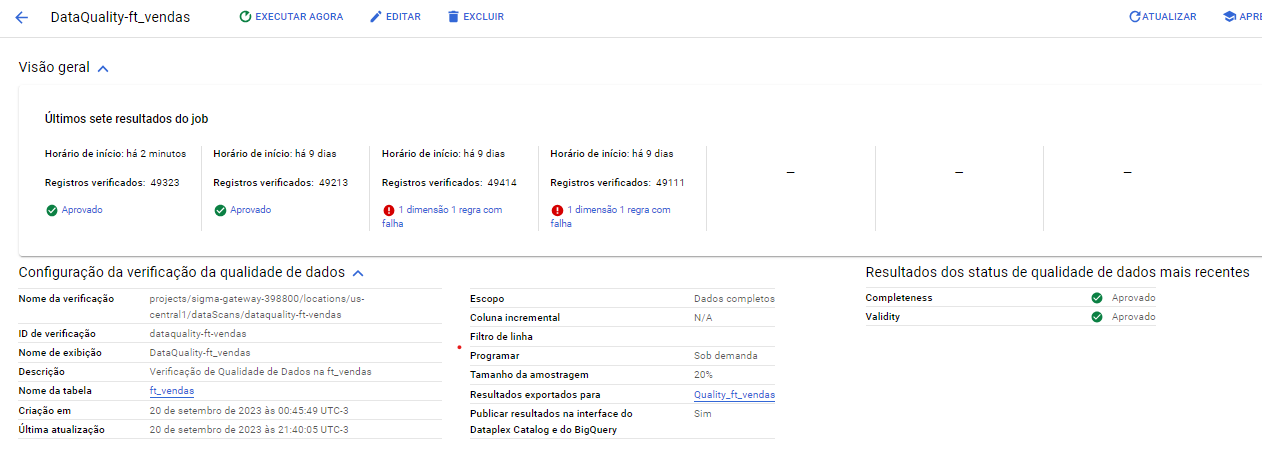

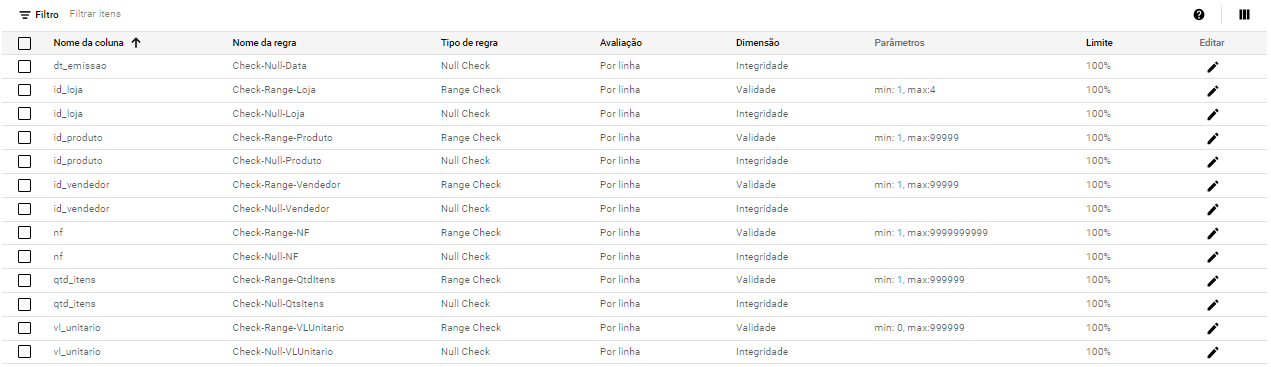

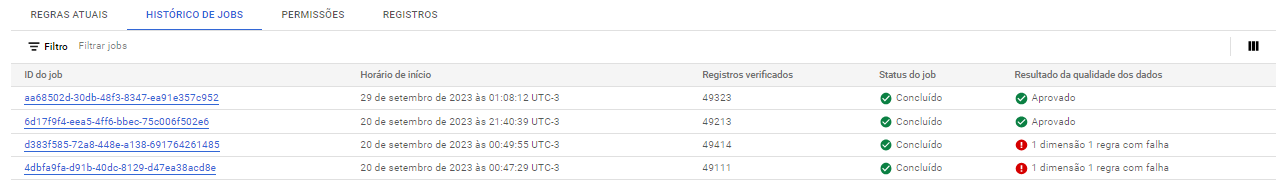

Podemos ver que, nas duas primeiras execuções, tivemos problemas, nos ajudando a voltar em nossa etapa de ETL e realizar os tratamentos devidos, para garantir a qualidade dos dados.

Após esses ajustes, temos nossa tabela íntegra e pronta para começarmos nossas análises!

###5.2) Perfil de Dados

Neste tópico, vamos trazer algumas execuções quanto ao âmbito de perfil de dados.

A execução de perfil de dados é uma maneira de você conhecer melhor sua base, com algumas análises estatísticas simples.

Executamos a verificação de perfil de dados, mais uma vez, para a ft_vendas, que é a tabela mais importante para todo nosso projeto.

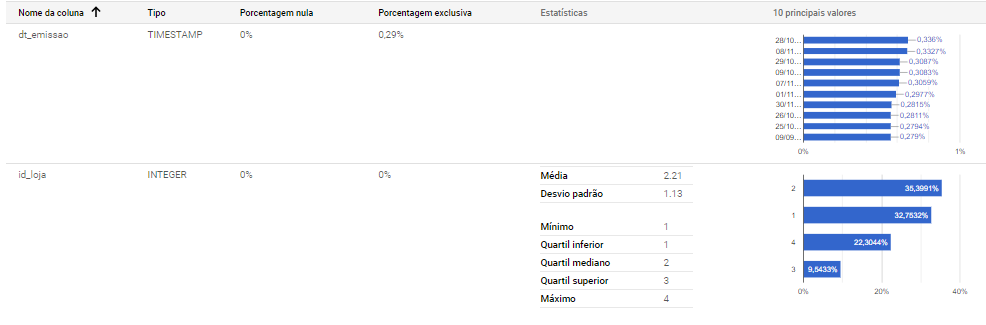

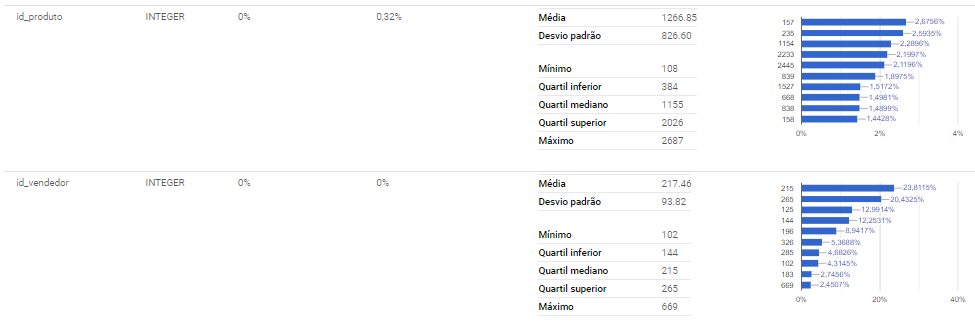

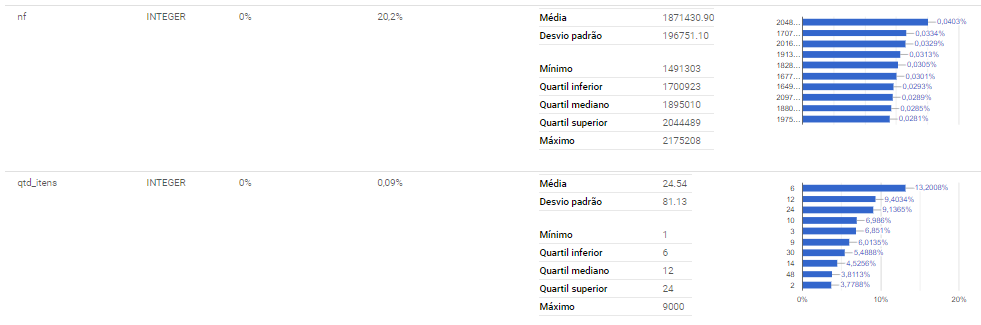

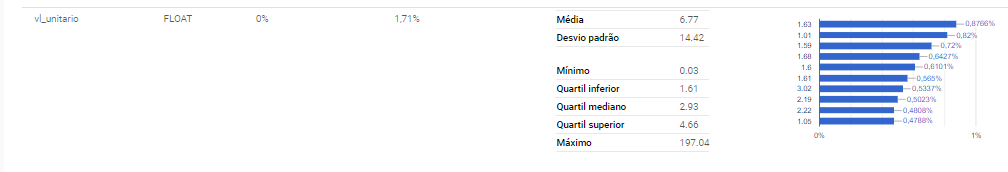

Essa análise de perfil de dados é muito interessante para analisarmos as informações que se tornarão métricas em nossa análise, como qtd_itens e vl_unitario.

Esta execução já nos retorna qual a Média, Desvio Padrão, Mínimo, Quartis, Mediana e Máximo.

Essas informações soltas, já podem trazer alguns insigths interessantes sobre a base estudada, exemplos:

*   A quantidade máxima de unidades de um item em uma venda foi 9000;
*   A quantidade média de unidades de um item em uma venda é de 24,54;
*   A quantidade de unidades que se repete mais vezes é 6;
*   A média do valor unitário das vendas é de R$ 6,77





###5.3) Análise de Dados

Neste tópico, vamos responder os pontos elencados em 1) Objetivo.

Iremos realizar as análises usando a linguagem SQL dentro do próprio BigQuery, além de criar um Dashboard em Power BI, se tornando um local mais dinâmico e amigável para que os usuários da empresa hipotética pudessem analisar os dados.


####5.3.1) Análise em SQL

##### **Query 1) Principais Indicadores**

Criada para gerar as seguintes respostas:

*   Indicadores de vendas
*   Comparação x Ano Anterior (Lembrando que nossos dados são de 2017 e 2018)
*   Alcance % e Desvio da Meta



In [ ]:
"""---------------------------- CTE ----------------------------------------------
WITH Metas_Ano as

(SELECT B.Ano,
        ROUND(SUM(vl_meta),2) as Valor_Meta
 FROM `DM_Vendas.ft_metas` A
 LEFT JOIN `DM_Vendas.dm_calendario` B on A.dt_meta = B.Date
 GROUP BY B.Ano)

---------------------------- Query ---------------------------------------------

SELECT B.Ano,
       SUM(qtd_itens)                                               as Volume_Vendido,
       ROUND(CASE WHEN LAG(SUM(qtd_itens), 1,0) OVER (ORDER BY B.Ano) = 0
            THEN 0
            ELSE SUM(qtd_itens) / LAG(SUM(qtd_itens), 1,0) OVER (ORDER BY B.Ano) - 1
            END,2)                                                  as Var_Perc_Volume_AA,
       ROUND(SUM(qtd_itens * vl_unitario),2)                        as Valor_Venda,
       ROUND(CASE WHEN LAG(ROUND(SUM(qtd_itens * vl_unitario),2), 1,0) OVER (ORDER BY B.Ano) = 0
                  THEN 0
                  ELSE ROUND(SUM(qtd_itens * vl_unitario),2) / LAG(ROUND(SUM(qtd_itens * vl_unitario),2), 1,0) OVER (ORDER BY B.Ano) - 1
                  END,2)                                            as Var_Perc_Venda_AA,
       COUNT(DISTINCT A.nf)                                         as Qtd_Cupons,
       ROUND(CASE WHEN LAG(COUNT(DISTINCT A.nf), 1,0) OVER (ORDER BY B.Ano) = 0
                  THEN 0
                  ELSE COUNT(DISTINCT A.nf) / LAG(COUNT(DISTINCT A.nf), 1,0) OVER (ORDER BY B.Ano) - 1
                  END,2)                                            as Var_Perc_Cupons_AA,
       ROUND(SUM(qtd_itens * vl_unitario) / SUM(qtd_itens),2)       as Preco_Medio,
       ROUND(CASE WHEN LAG(SUM(qtd_itens * vl_unitario) / SUM(qtd_itens), 1,0) OVER (ORDER BY B.Ano) = 0
                  THEN 0
                  ELSE SUM(qtd_itens * vl_unitario) / SUM(qtd_itens) / LAG(SUM(qtd_itens * vl_unitario) / SUM(qtd_itens), 1,0) OVER (ORDER BY B.Ano) - 1
                  END,2)                                            as Var_Preco_Medio_AA,
       ROUND(SUM(qtd_itens * vl_unitario) / COUNT(DISTINCT A.nf),2) as Ticket_Medio,
       ROUND(CASE WHEN LAG(SUM(qtd_itens * vl_unitario) / COUNT(DISTINCT A.nf), 1,0) OVER (ORDER BY B.Ano) = 0
                  THEN 0
                  ELSE SUM(qtd_itens * vl_unitario) / COUNT(DISTINCT A.nf) / LAG(SUM(qtd_itens * vl_unitario) / COUNT(DISTINCT A.nf), 1,0) OVER (ORDER BY B.Ano) - 1
                  END,2)                                            as Var_Ticket_Medio_AA,
       C.Valor_Meta                                                 as Valor_Meta,
       ROUND(SUM(qtd_itens * vl_unitario) - C.Valor_Meta,2)         as Desvio_Meta,
       ROUND(SUM(qtd_itens * vl_unitario) / C.Valor_Meta,2)         as Alcance_Meta,
       CASE WHEN LAG(SUM(qtd_itens * vl_unitario) / C.Valor_Meta, 1,0) OVER (ORDER BY B.Ano) = 0
            THEN 0
            ELSE ROUND(SUM(qtd_itens * vl_unitario) / C.Valor_Meta,2) - LAG(ROUND(SUM(qtd_itens * vl_unitario) / C.Valor_Meta,2),1,0) OVER (ORDER BY B.Ano) END as Var_pp_Alcance_Meta

FROM `DM_Vendas.ft_vendas` A

LEFT JOIN `DM_Vendas.dm_calendario` B on A.dt_emissao = B.Date

LEFT JOIN Metas_Ano C on B.Ano = C.Ano

GROUP BY B.Ano,
         C.Valor_Meta

ORDER BY B.Ano asc"""

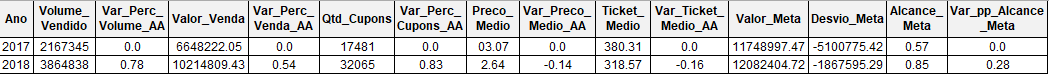

Notamos que tivemos um ótimo desempenho comparando 2018 vs 2017. Tivemos um crescimento de 78% em Volume Vendido, 54% em Faturamento e 83% em Cupons de venda.

Podemos fazer uma correlação do crescimento destes indicadores com a queda do preço médio, que teve uma diminuição de 14%.

É factível dizer então que a empresa adotou como estratégia a redução do preço de seus produtos, conseguindo assim gerar um maior número de vendas realizadas e volumes vendidos. Isto resultou num alto crescimento do faturamento no A-1.

Porém, analisando os impactos que isso pode acarretar para empresa, esta estratégia gera uma preocupação com a Margem da companhia. Porém, neste momento, não itemos nos aprofundar sobre este indicador.

Em relação a meta, conseguimos ter uma melhor performance sobre o esperado, saindo de um Alcance % da Meta de 57% em 2017 para 85% em 2018, uma variação positiva de 28 p.p.


##### **Query 2) Melhores dias de Vendas**

In [ ]:
"""SELECT CAST(dt_emissao as date)             as Data,
       ROUND(SUM(qtd_itens * vl_unitario))  as Valor_Venda

FROM `DM_Vendas.ft_vendas`

GROUP BY dt_emissao

ORDER BY Valor_Venda desc

Limit 5"""


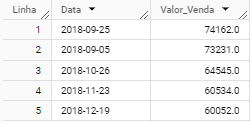


Foram listadas acima os 5 melhores dias de venda da empresa.

Está análise, por mais que pareça ser simples, pode gerar grandes insigths, se analisadas em conjunto com outras informações.

A pergunta que deve ser feita: *O que foi feito nestes dias?*

Tendo em mente a estratégia adotada nestes dias, a empresa pode repetí-las futuramente, a fim de obter números expressivos de faturamento.

##### Query 3) Análise de Pareto

A análise de pareto é uma análise muito conhecida e utilizada para tomada de decisões. Ela consiste em dizer que 80% das consequencias advêm de 20% das causas.

Trazendo para nosso exemplo de vendas do varejo, estamos analisando quantas categorias representam 80% do faturamento de 2018. Poderíamos realizar esta mesma análise para produtos, de uma forma mais granular.

In [ ]:
"""WITH SOMATORIO as

(SELECT B.nm_grupo_produto as Grupo_Produto,
        SUM(vl_unitario * qtd_itens) as Vl_Venda

FROM `sigma-gateway-398800.DM_Vendas.ft_vendas` A

LEFT JOIN `DM_Vendas.dm_produto` B on A.id_produto = B.id_produto

LEFT JOIN `DM_Vendas.dm_calendario` C on A.dt_emissao = C.Date

WHERE C.Ano = 2018

GROUP BY nm_grupo_produto
)

----------------------------------------------------

SELECT Grupo_Produto,
       ROUND(Vl_Venda,2) as Vl_Venda,
       ROUND(SUM(Vl_Venda) OVER (ORDER BY Vl_Venda DESC
		                       ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW),2) AS Acumulado,
	     ROUND(SUM(Vl_Venda) OVER (ORDER BY Vl_Venda DESC
		                       ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)  / (SELECT SUM(Vl_Venda) * 1.0 FROM SOMATORIO),2)  AS Perc_Pareto

FROM SOMATORIO

ORDER BY 2 DESC"""

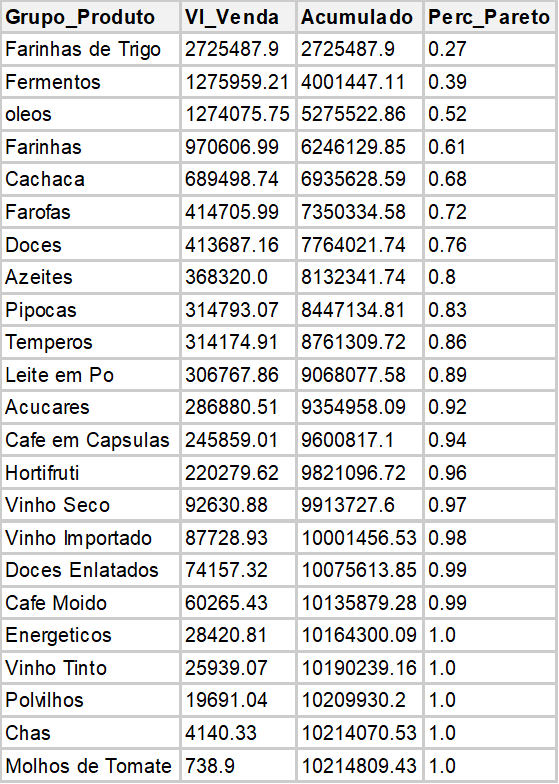

Analisando o resultado acima, temos 23 categorias vendidas em 2018. Podemos perceber que, com apenas 8 categorias, a empresa faz 80% de faturamento. Ou seja, é possível afirmar que 80% do faturamento advêm de 34% das categorias.

Essa informação auxilia na tomada de decisão de que qual categoria fortalecer, qual parar de vender etc.

##### Query 4) Análise de Cesta

Na análise de cesta, ou vendas casadas, temos o objetivo de identificar quais são as categorias que costumam sair juntas no mesmo cupom fiscal. Esta análise tem como inspiração o estudo clássico em que um supermercado descobriu que os clientes que compravam fraldas, normalmente compravam cerveja também.

Este estudo pode direcionar o planograma das lojas, deixando categorias que costumam ser vendidas juntas mais próximas uma das outras, ou então até mesmo oferecer promoções caso leve as duas categorias juntas.

In [ ]:
"""------------------ CTE -----------------------

WITH Qtd_Cupons_Total as

(
SELECT B.nm_grupo_produto as Grupo_Produto,
       COUNT(distinct nf) as Qtd_Vendas

FROM `DM_Vendas.ft_vendas` A

LEFT JOIN `DM_Vendas.dm_produto` B on A.id_produto = B.id_produto

LEFT JOIN `DM_Vendas.dm_calendario` C on A.dt_emissao = C.Date

WHERE C.Ano = 2018

GROUP BY B.nm_grupo_produto
)

,Vendas_Grupos as

(
SELECT B.nm_grupo_produto as Grupo_Produto,
       nf

FROM `DM_Vendas.ft_vendas` A

LEFT JOIN `DM_Vendas.dm_produto` B on A.id_produto = B.id_produto

LEFT JOIN `DM_Vendas.dm_calendario` C on A.dt_emissao = C.Date

WHERE C.Ano = 2018)

,Cestas_Vendas as

(SELECT A.Grupo_Produto as Grupo1,
        B.Grupo_Produto as Grupo2,
        A.nf as nf1,
        B.nf as nf2

FROM Vendas_Grupos A,
     Vendas_Grupos B

WHERE A.nf = B.nf
  AND A.Grupo_Produto <> B.Grupo_Produto)

-------------------------------- Query-------------------------------------

SELECT Grupo1,
       Grupo2,
       Count(distinct nf1)                          as Qtd_Vendas_Casadas,
       B.Qtd_Vendas                                 as Total_Cupons_Grupo1,
       ROUND(Count(distinct nf1) / B.Qtd_Vendas,2)  as Perc_Vendas_Casadas

FROM Cestas_Vendas A

LEFT JOIN Qtd_Cupons_Total B on A.Grupo1 = B.Grupo_Produto

GROUP BY Grupo1,
         Grupo2,
         B.Qtd_Vendas

HAVING Count(distinct nf1) >= 1000

ORDER BY Perc_Vendas_Casadas desc"""


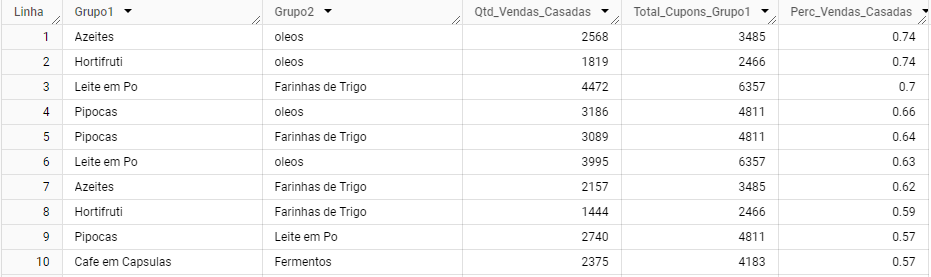

Analisando o resultado acima, notamos que as categorias que mais saem em conjunto (percentualmente) são Azeites com Óleos, seguido de Hortifruti com Óleos e Leite em Pó com Farinhas de Trigo.

Estas 3 combinações juntas, possuem um percentual de venda casada bem alta, na casa dos 70%.

A empresa pode explorar essas informações e criar estratégias seguimentadas para estas categorias de produtos.

####5.3.2) Power BI

Link do Dashboard: https://app.powerbi.com/view?r=eyJrIjoiYzFlMmY2NmQtNTNlMS00ODIzLTllODYtYjkyNzUwZmJmZWY2IiwidCI6Ijk1MzVlMWY2LTk3MDYtNGNiNy04ZjIzLTk1YWEzODA5OGFiYiJ9

##### Análise 1) Indicadores de Venda

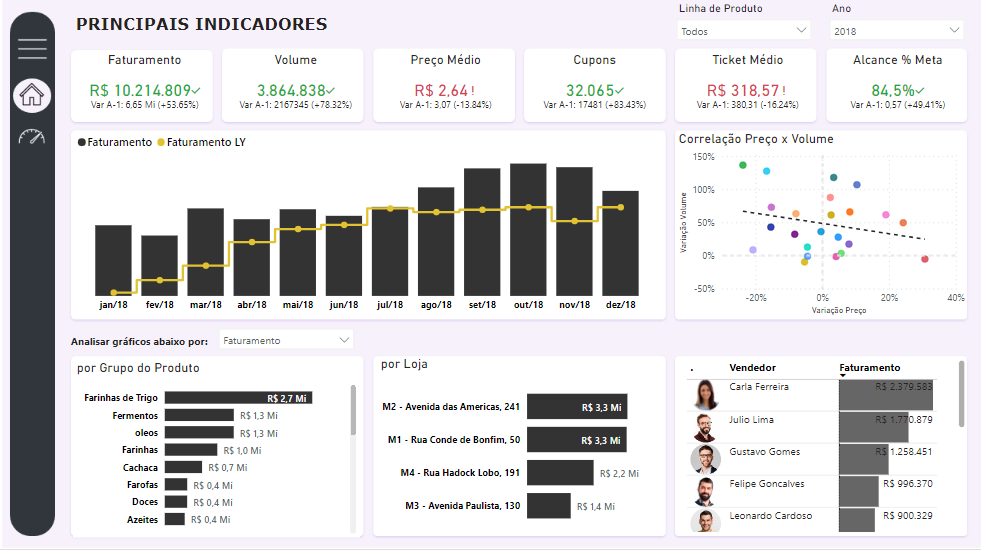

No print do Dashboard acima, conseguimos perceber que a empresa, em 2018, apresente resultados melhores do que o ano anterior, exceto em relação ao Preço Médio e Ticket Médio, como ja foi comentado no tópico anterior.

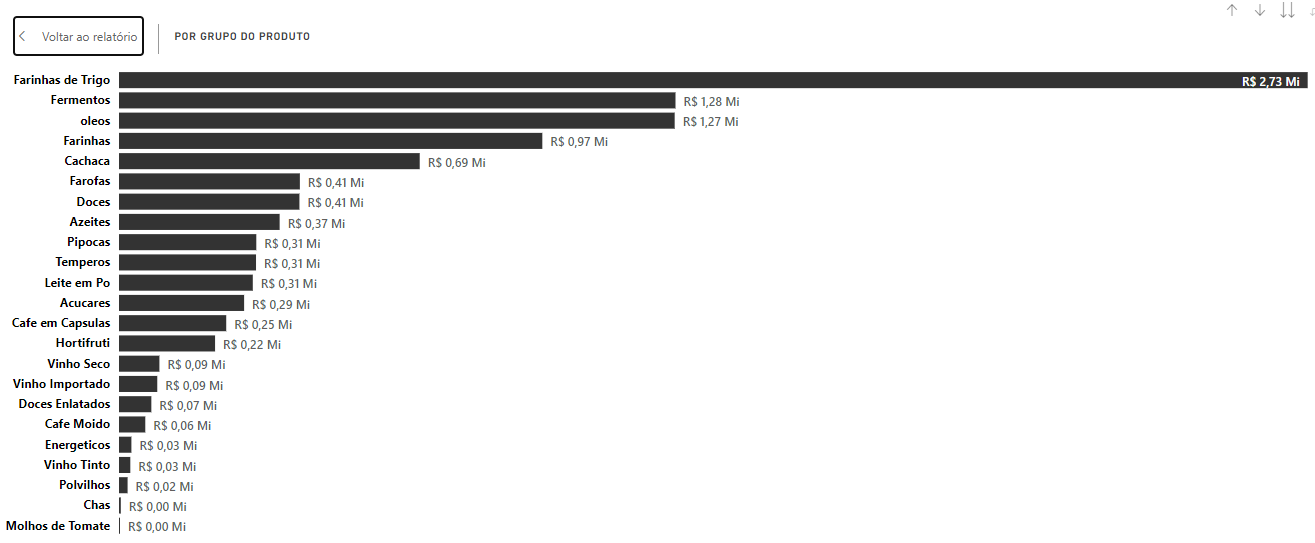

Em relação as categorias de produtos com maior representatividade de vendas, temos farinhas de trigo como o grupo de produto mais forte da companhia, seguido de fermentos e óleos.

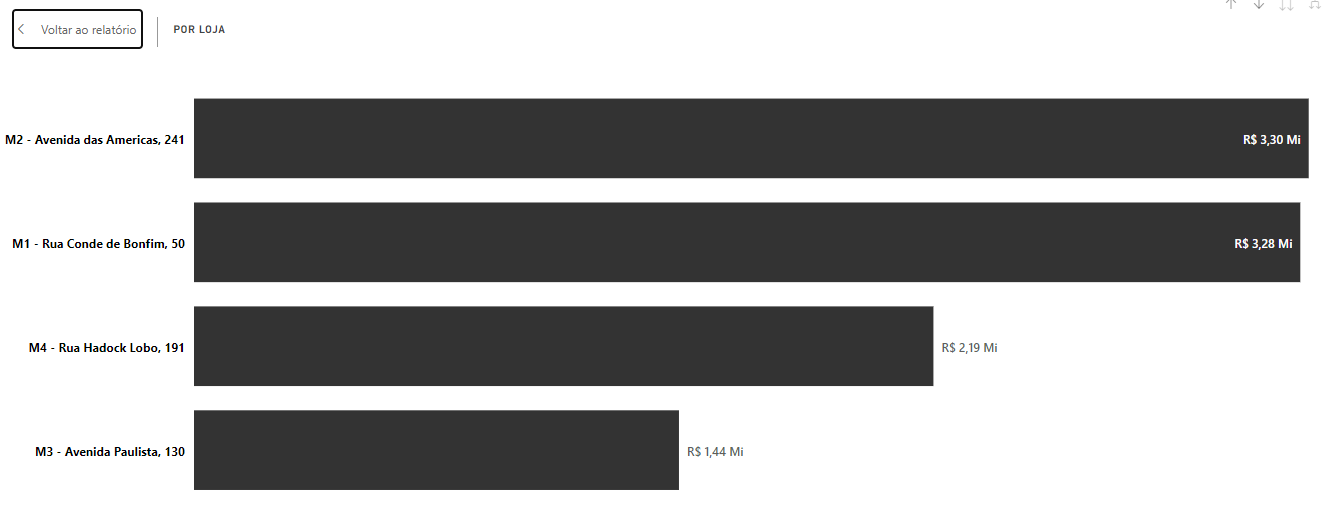

Em relação a lojas, a loja M2 - Avenida das Américas é onde temos o maior faturamento, seguida da M1 - Rua conde de Bonfim. Ponto de atenção para a loja M3 - Avenida Paulista, que apresenta um desempenho bem abaixo das outras.

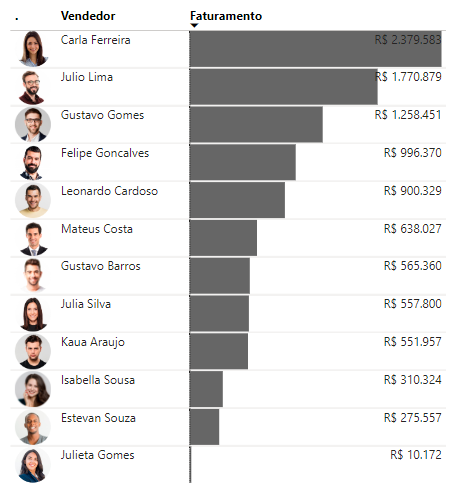

Em relação aos vendedores, a Carla Ferreira é a Top 1 da companhia, seguido pelo Julio e Gustavo. É necessário analisar o desempenho da Isabella, Estevan e Julieta, que possuem um faturamento bem abaixo dos demais.

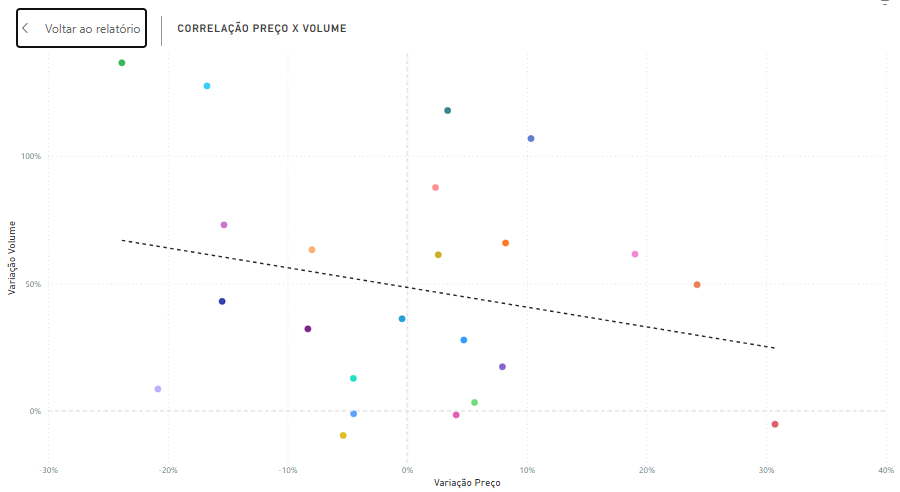

Aqui estamos analisando a Variação do Volume, Ano x Ano, contra a Variação de Preço, também Ano x Ano.

Quanto mais para cima, quer dizer que maior o crescimento em volume da categoria analisada. Quanto mais para esquerda, maior a redução de preço.

Temos então 3 categorias que chamam atenção, a dos extremos. Vamos analisar:

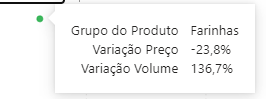

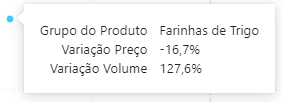

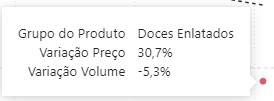

Analisando as categorias, conseguimos de fato perceper que existe uma correlação em que, quando eu abaixo o preço, eu ganho venda em volume, e vice-versa.

##### Análise 2) Performance de Resultados

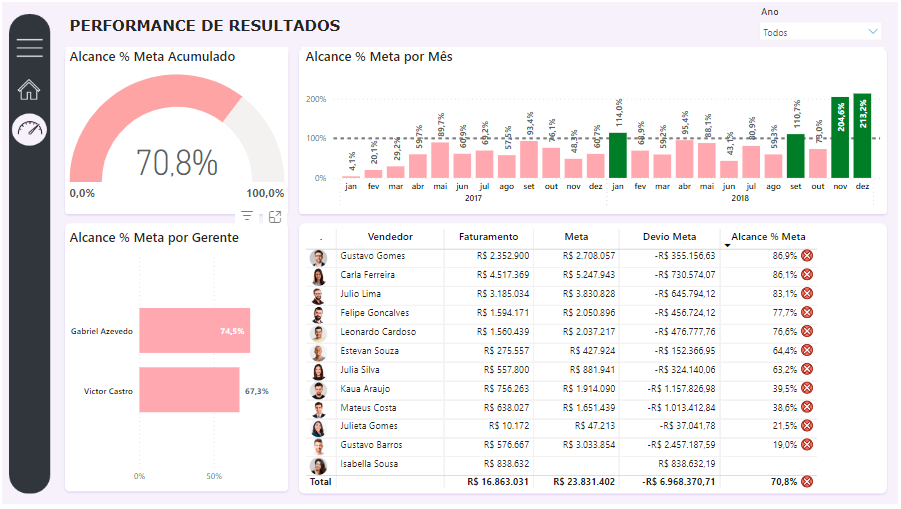

Analisando o print acima, gera uma preocupação: A empresa não está batendo o resultado esperado!


Em 24 meses de vendas, a empresa só alcança o esperado em 4.

O que gera um pouco de esperança é que, se olharmos o curto prazo, no final de 2018, ela consegue ter um bom desempenho, alcançando o resultado em 3 meses e criando uma "gordura" considerável.

O desempenho dos Vendedores também deixa a desejar, onde nenhum está alcançando o esperado.

## 6) Próximos Passos

Fazendo um panorama geral do projeto desenvolvido, vejo que foi um excelente aprendizado e trouxe muita bagagem para futuros projetos. Porém, utilizando a GCP, encontrei algumas dificuldades, que abaixo serão listadas:



*   Não consegui criar a linhagem de dados. Por mais que as ferramentas de ETL tragam um pouco esta visão, seria legal dentro da documentação das tabelas do BigQuery conseguir ver todo o "histórico" do dado, desde sua origem.

*   Tempo de execução dos pipelines no Data Fusion muito grandes. Como eram arquivos Csv, relativamente pequenos e armazenados dentro da própria Google, imaginava que o tempo dos pipelines fosse reduzido. Sei que, como estamos usando uma versão "Basic", com pouco processamento, isso pode acontecer, mas ligou um alerta sobre esse ponto.


Neste projeto, focamos na GCP, mas creio que, após aprender toda a jornada da engenharia de dados, será "fácil" executar o mesmo projeto em outras clouds como, AWS e Azure.

